IMPORTING THE LIBRARIS NEEDED

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


READING IN THE DATASET

In [50]:
client_df = pd.read_csv(r'C:\Users\USER\Desktop\ds\client_data.csv')
price_df = pd.read_csv(r'C:\Users\USER\Desktop\ds\price_data.csv')


VIEWING THE CLIENT DATASET FIRST 5 ROWS

In [50]:
client_df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


VIEING THE FIRST 5 ROWS OF PRICE DATASET

In [77]:
price_df.head()


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


SHAPE OF BOTH DATASTES

In [4]:
print(client_df.shape)
print(price_df.shape)


(14606, 26)
(193002, 8)


DESCRIPTION STATISTICS OF CLIENT_DF

In [5]:
client_df.describe()


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


DESCRIPTIVE STATISTICS OF PRICE_DF

In [6]:
price_df.describe()


,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


DATA TYPES OF BOTH DATASET

In [8]:
client_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


DISTRIBUTION OF COLUMNS USING HISPLOT

In [9]:
client_df.isna().sum()


id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

CONVERTING THE DATE COLUMNS FROM OBJECT INTO DATE TIME TYPE

In [51]:
cols = [col for col in client_df.columns if "date" in col]
for col in cols:
    client_df[col] = pd.to_datetime(client_df[col], errors='coerce')


In [52]:
cols = [col for col in price_df.columns if "date" in col]
for col in cols:
   price_df[col] = pd.to_datetime(price_df[col], errors='coerce')


CHECKING FOR CORRECTION

In [12]:
client_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

DISTRIBUTION PLOT OF CLIENT COLUMNS USING HISTPLOT

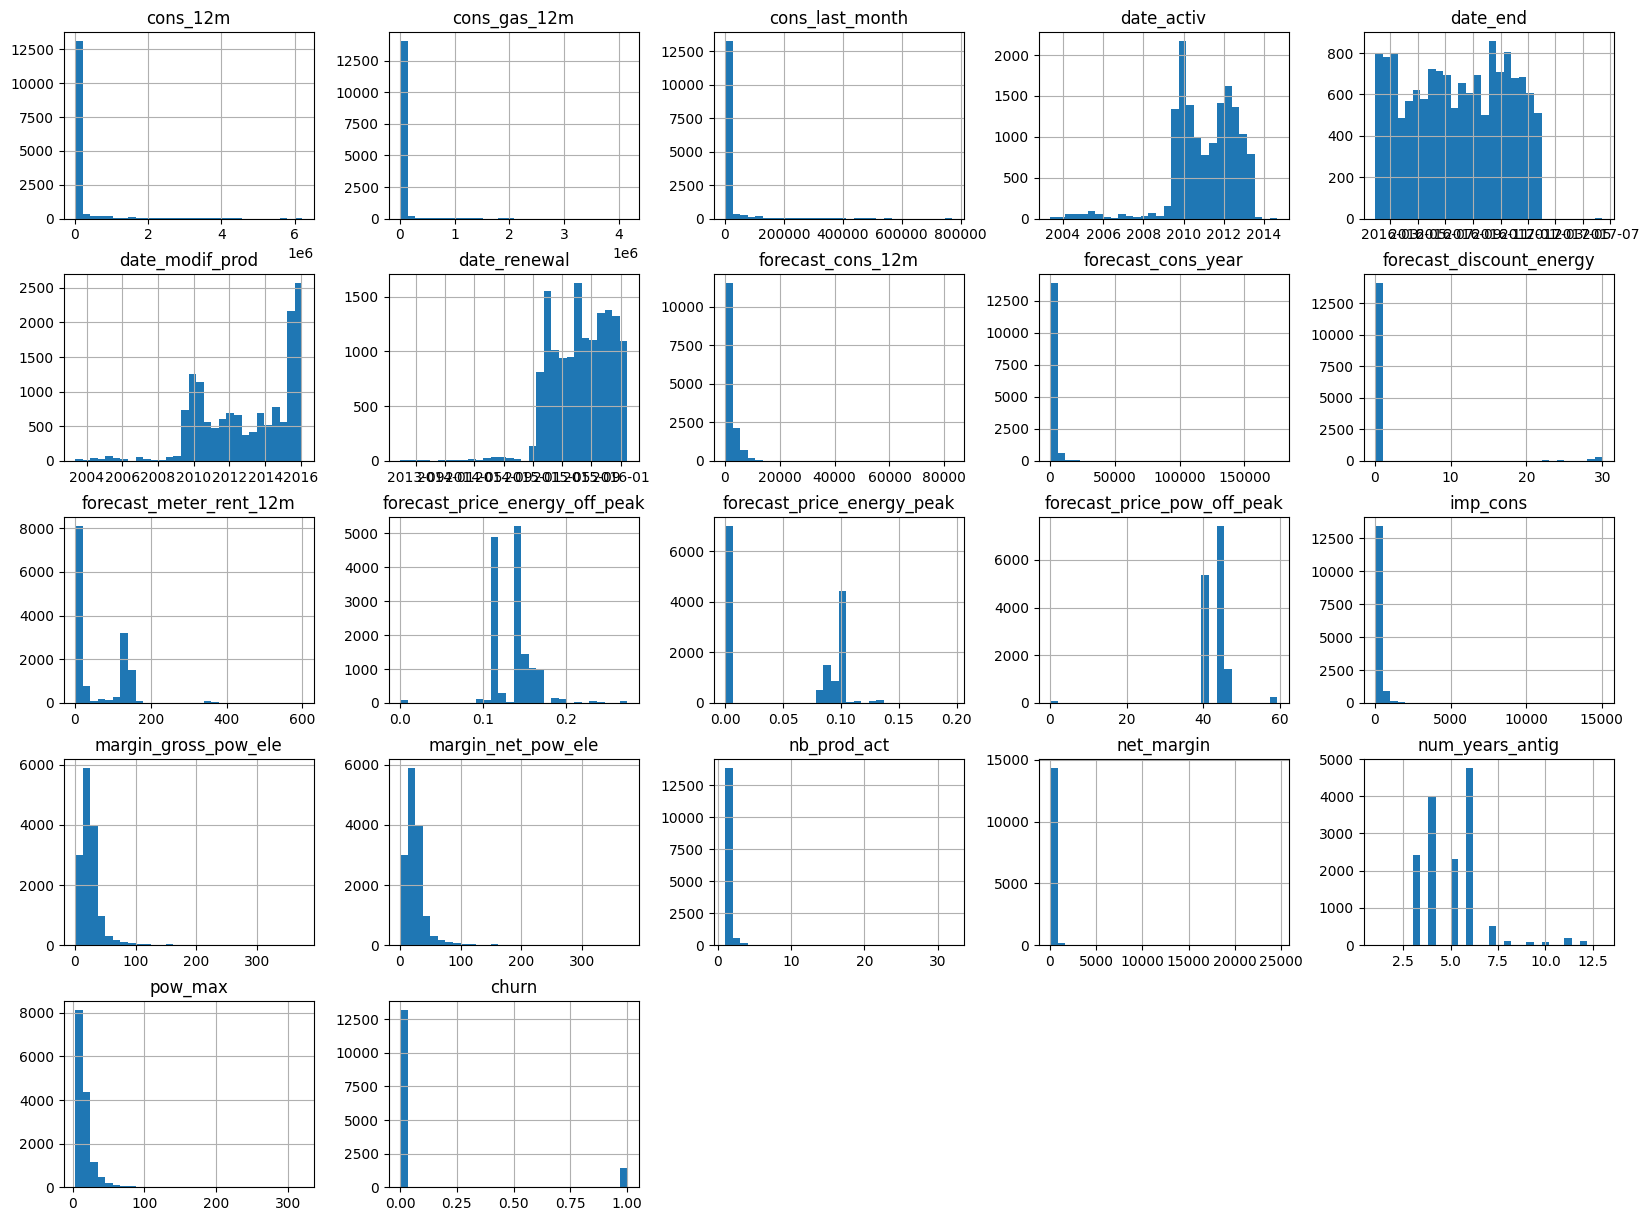

In [ ]:
client_df.hist(figsize=(20, 15), bins=30);


DISTRIBUTION PLOT OF PRICE COLUMNS USING HISTPLOT

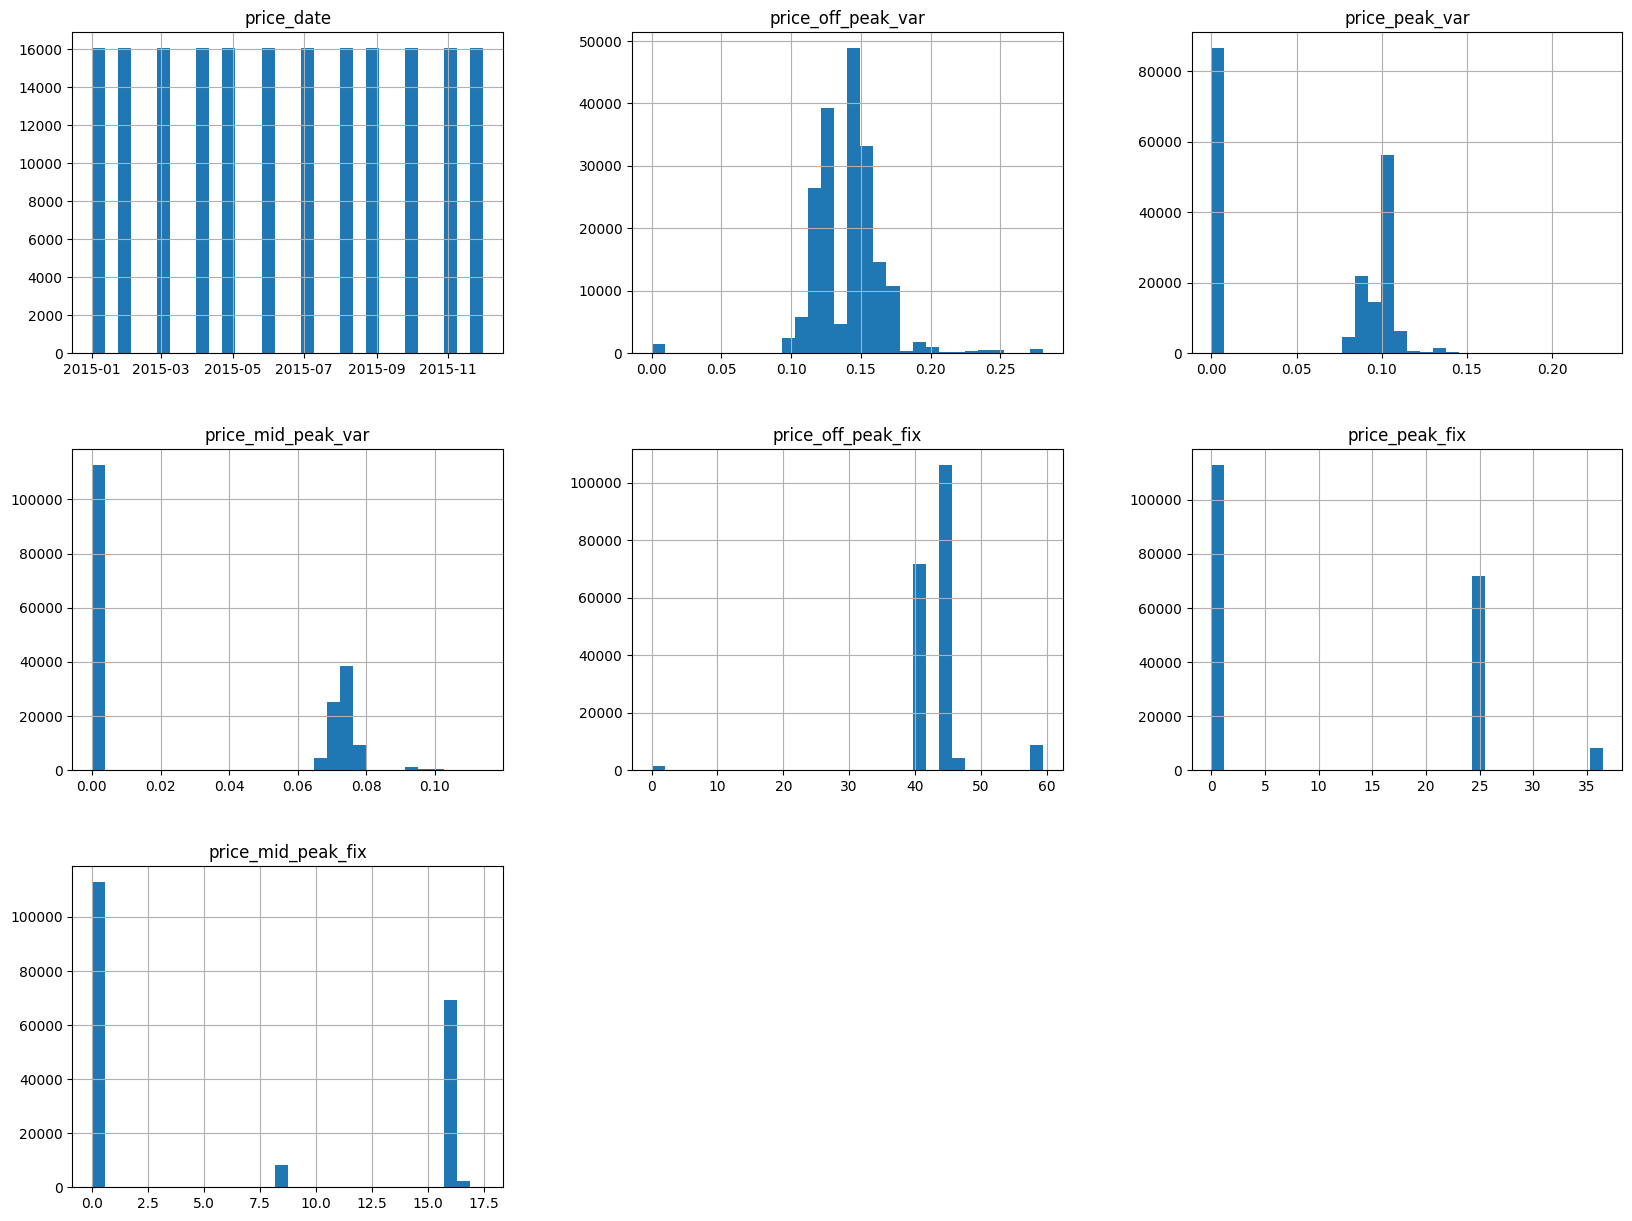

In [29]:
price_df.hist(figsize=(20, 15), bins=30);


COUNT OF CHURN CUSTOMERS

churn
0    13187
1     1419
Name: count, dtype: int64


<Axes: title={'center': 'Churn Distribution'}, xlabel='churn'>

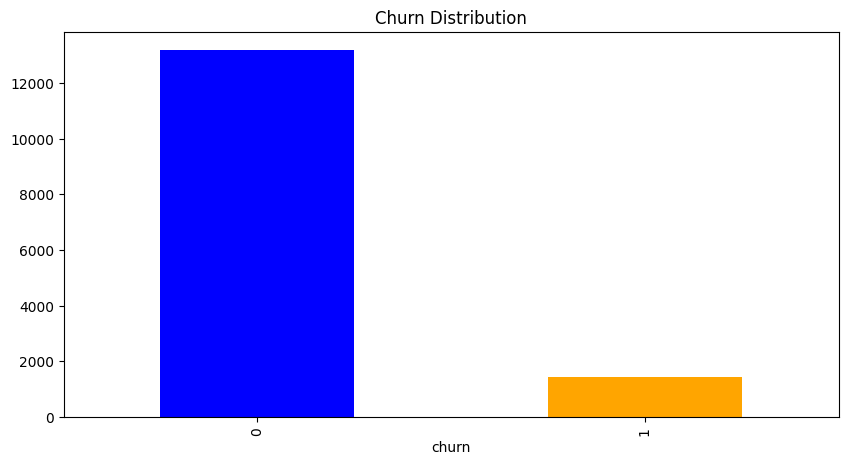

In [44]:
print(client_df['churn'].value_counts())
client_df['churn'].value_counts().plot(kind='bar', title='Churn Distribution', figsize=(10, 5), color=['blue', 'orange'])


PIE DISTRIBUTION OF CHURN

<Axes: title={'center': 'Churn Distribution'}, ylabel='count'>

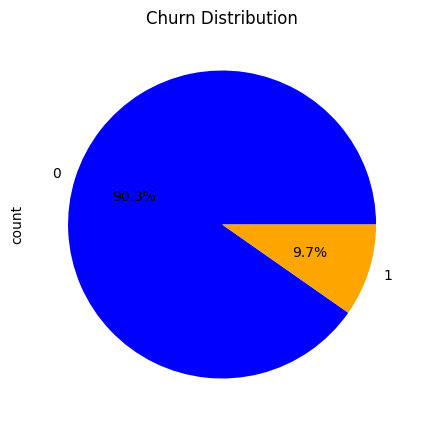

In [31]:
client_df['churn'].value_counts().plot(kind='pie', title='Churn Distribution', figsize=(10, 5), autopct='%1.1f%%', colors=['blue', 'orange'])


CHANNEL SALES VALUES COUNTS

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64


<Axes: title={'center': 'Channel Sales Distribution'}, xlabel='channel_sales'>

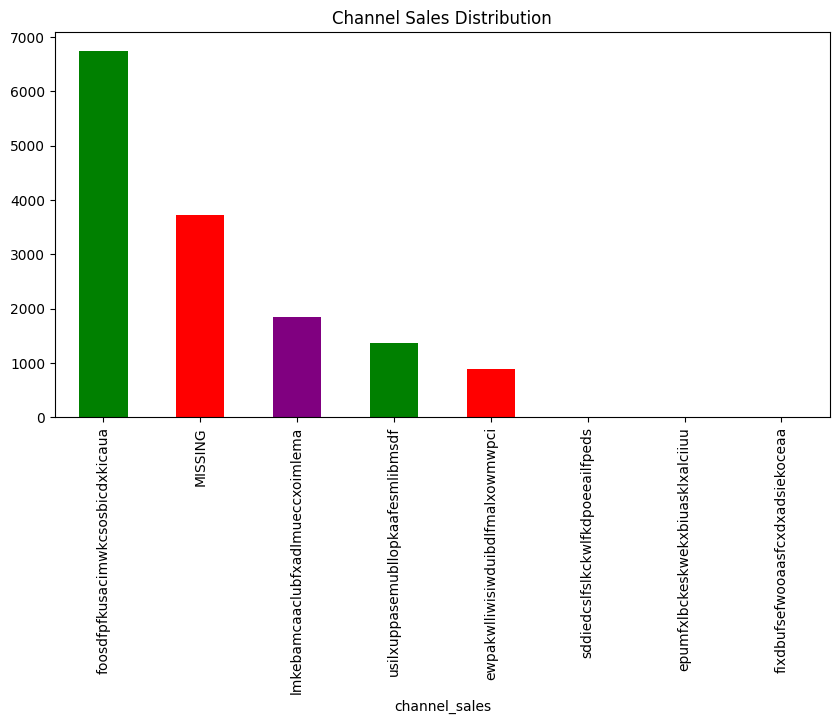

In [7]:
print(client_df['channel_sales'].value_counts())
client_df['channel_sales'].value_counts().plot(kind='bar', title='Channel Sales Distribution', figsize=(10, 5), color=['green', 'red', 'purple'])


DISTRIBUTION OF NO CHURN AND CHURN OF CUSTOMERS AS PER CHANNEL SALES

<Axes: title={'center': 'Churn Distribution for MISSING Channel Sales'}, ylabel='proportion'>

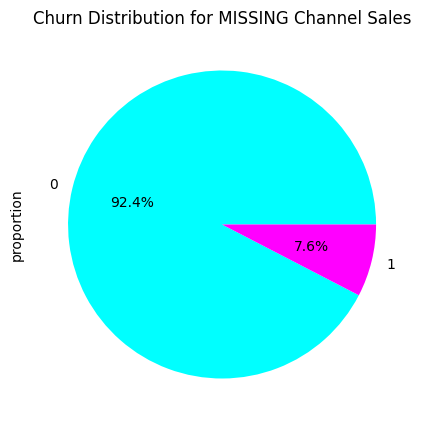

In [ ]:
df_channel_churn = client_df[client_df['channel_sales'] == 'MISSING']['churn']

df_channel_churn.value_counts(normalize=True).plot(kind='pie', title='Churn Distribution for MISSING Channel Sales', figsize=(10, 5), autopct='%1.1f%%', colors=['cyan', 'magenta'])


<Axes: title={'center': 'Churn Distribution for foosdfpfkusacimwkcsosbicdxkicaua Channel Sales'}, ylabel='proportion'>

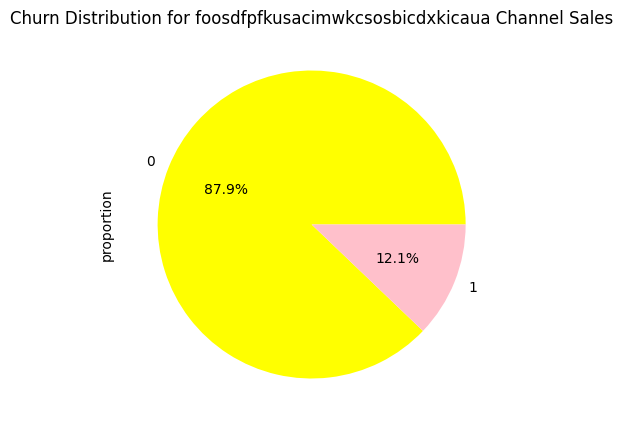

In [15]:
df_channel_churn2 = client_df[client_df['channel_sales'] == 'foosdfpfkusacimwkcsosbicdxkicaua']['churn']
df_channel_churn2.value_counts(normalize=True).plot(kind='pie', title='Churn Distribution for foosdfpfkusacimwkcsosbicdxkicaua Channel Sales', figsize=(10, 5), autopct='%1.1f%%', colors=['yellow', 'pink'])


<Axes: title={'center': 'Churn Distribution for lmkebamcaaclubfxadlmueccxoimlema Channel Sales'}, ylabel='proportion'>

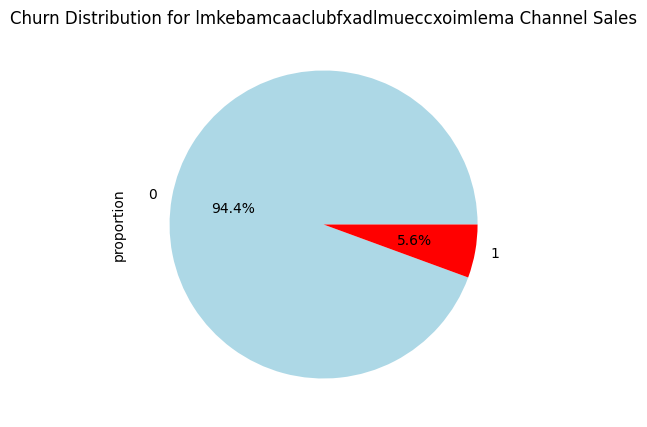

In [17]:
df_channel_churn3 = client_df[client_df['channel_sales'] == 'lmkebamcaaclubfxadlmueccxoimlema']['churn']
df_channel_churn3.value_counts(normalize=True).plot(kind='pie', title='Churn Distribution for lmkebamcaaclubfxadlmueccxoimlema Channel Sales', figsize=(10, 5), autopct='%1.1f%%', colors=['lightblue', 'Red'])


<Axes: title={'center': 'Churn Distribution for usilxuppasemubllopkaafesmlibmsdf Channel Sales'}, ylabel='proportion'>

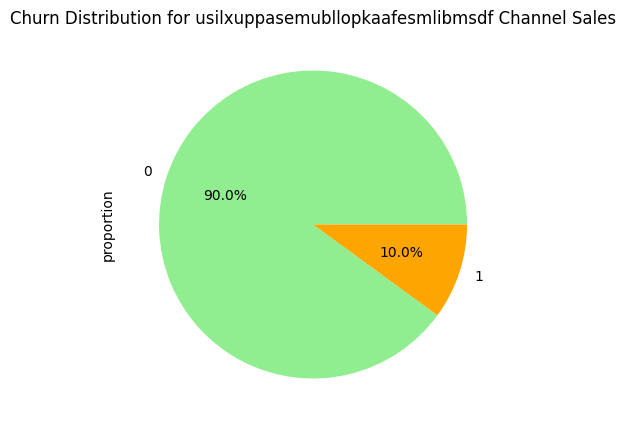

In [ ]:
df_channel_churn4 = client_df[client_df['channel_sales'] == 'usilxuppasemubllopkaafesmlibmsdf']['churn']
df_channel_churn4.value_counts(normalize=True).plot(kind='pie', title='Churn Distribution for usilxuppasemubllopkaafesmlibmsdf Channel Sales', figsize=(10, 5), autopct='%1.1f%%', colors=['lightgreen', 'orange'])


<Axes: title={'center': 'Churn Distribution for ewpakwlliwisiwduibdlfmalxowmwpci Channel Sales'}, ylabel='proportion'>

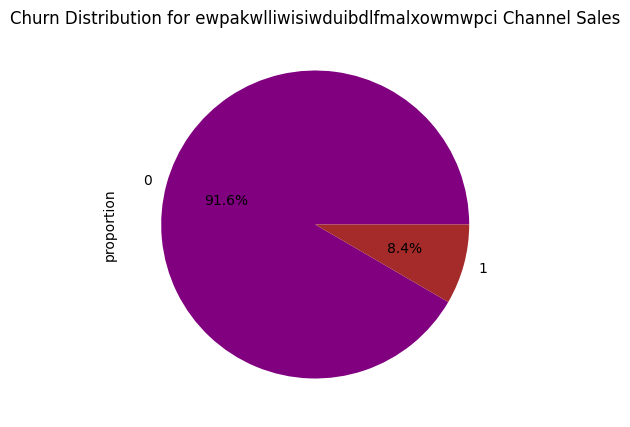

In [ ]:
df_channel_churn4 = client_df[client_df['channel_sales'] == 'ewpakwlliwisiwduibdlfmalxowmwpci']['churn']
df_channel_churn4.value_counts(normalize=True).plot(kind='pie', title='Churn Distribution for ewpakwlliwisiwduibdlfmalxowmwpci Channel Sales', figsize=(10, 5), autopct='%1.1f%%', colors=['purple', 'brown'])


<Axes: title={'center': 'Churn Distribution for sddiedcslfslkckwlfkdpoeeailfpeds Channel Sales'}, ylabel='proportion'>

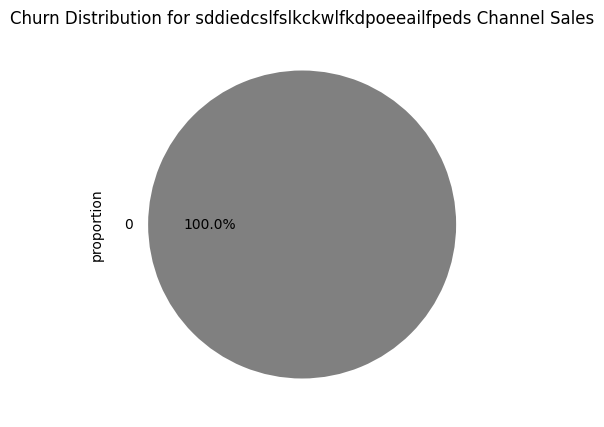

In [ ]:
df_channel_churn4 = client_df[client_df['channel_sales'] == 'sddiedcslfslkckwlfkdpoeeailfpeds']['churn']
df_channel_churn4.value_counts(normalize=True).plot(kind='pie', title='Churn Distribution for sddiedcslfslkckwlfkdpoeeailfpeds Channel Sales', figsize=(10, 5), autopct='%1.1f%%', colors=['grey', 'pink'])


<Axes: title={'center': 'Churn Distribution for epumfxlbckeskwekxbiuasklxalciiuu Channel Sales'}, ylabel='proportion'>

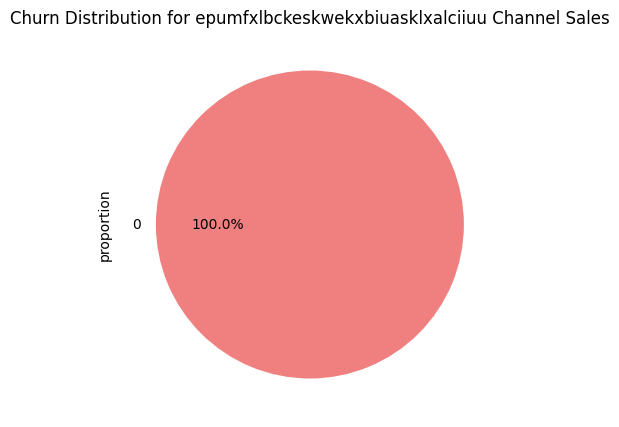

In [ ]:
df_channel_churn6 = client_df[client_df['channel_sales'] == 'epumfxlbckeskwekxbiuasklxalciiuu']['churn']
df_channel_churn6.value_counts(normalize=True).plot(kind='pie', title='Churn Distribution for epumfxlbckeskwekxbiuasklxalciiuu Channel Sales', figsize=(10, 5), autopct='%1.1f%%', colors=['lightcoral', 'gold'])


<Axes: title={'center': 'Churn Distribution for fixdbufsefwooaasfcxdxadsiekoceaa Channel Sales'}, ylabel='proportion'>

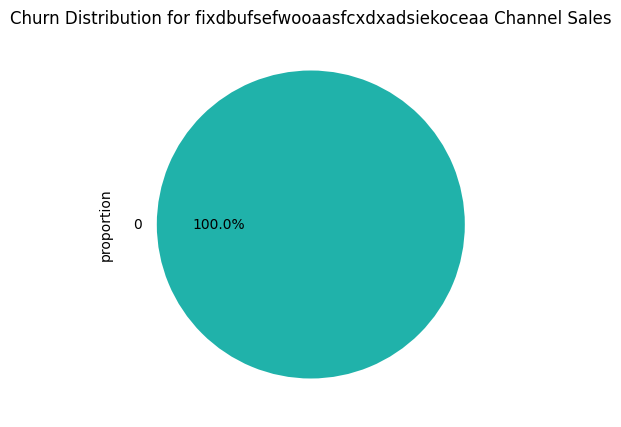

In [ ]:
df_channel_churn7 = client_df[client_df['channel_sales'] == 'fixdbufsefwooaasfcxdxadsiekoceaa']['churn']
df_channel_churn7.value_counts(normalize=True).plot(kind='pie', title='Churn Distribution for fixdbufsefwooaasfcxdxadsiekoceaa Channel Sales', figsize=(10, 5), autopct='%1.1f%%', colors=['lightseagreen', 'darkorange'])


FEATURE ENGINERRING

MERGING BOTH DATASETS

In [53]:
df = client_df.merge(price_df, on='id', how='inner')
print(df.shape)
df


(175149, 33)


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

In [71]:
df.columns


Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

# FEATURE ENGINERRING

In [54]:

df['tenure_days'] = (df['date_end'] - df['date_activ']).dt.days      # Calculate tenure in days
df['days_since_modif'] = (df['date_end'] - df['date_modif_prod']).dt.days   # Calculate days since last modification
df['days_to_renewal'] = (df['date_renewal'] - df['date_end']).dt.days     # Calculate days to renewal

# Consumption features
df['avg_monthly_cons'] = df['cons_12m'] / 12   # Average monthly consumption
df['cons_change'] = df['cons_last_month'] - df['avg_monthly_cons']   # Change in consumption from last month to average monthly consumption
df['gas_ele_ratio'] = df['cons_gas_12m'] / (df['cons_12m'] + 1e-5)    # Gas to electricity consumption ratio, avoiding division by zero
df['imp_cons_ratio'] = df['imp_cons'] / (df['cons_12m'] + 1e-5)    # Imported consumption ratio, avoiding division by zero

# Forecast features
df['forecast_error_12m'] = df['forecast_cons_12m'] - df['cons_12m']    # Forecast error for 12 months
df['forecast_error_year'] = df['forecast_cons_year'] - df['cons_12m']   # Forecast error for the year
df['discount_per_kwh'] = df['forecast_discount_energy'] / (df['forecast_cons_12m'] + 1e-5)   # Discount per kWh, avoiding division by zero

# Price features
df['peak_offpeak_var_diff'] = df['price_peak_var'] - df['price_off_peak_var']   # Difference between peak and off-peak variable prices
df['peak_offpeak_fix_diff'] = df['price_peak_fix'] - df['price_off_peak_fix']   # Difference between peak and off-peak fixed prices
df['midpeak_offpeak_var_diff'] = df['price_mid_peak_var'] - df['price_off_peak_var']   # Difference between mid-peak and off-peak variable prices
df['midpeak_offpeak_fix_diff'] = df['price_mid_peak_fix'] - df['price_off_peak_fix']   # Difference between mid-peak and off-peak fixed prices

# Margin features
df['gross_net_margin_ratio'] = df['margin_gross_pow_ele'] / (df['margin_net_pow_ele'] + 1e-5)  # Ratio of gross to net margin for power and electricity, avoiding division by zero
df['margin_per_product'] = df['net_margin'] / (df['nb_prod_act'] + 1e-5)     # Margin per product, avoiding division by zero

# Product features
df['has_multiple_products'] = (df['nb_prod_act'] > 1).astype(int)   # Binary feature indicating if the client has multiple products

# Categorical encoding

  # One-hot encode categorical variables, dropping the first category to avoid multicollinearity

# Power features
df['pow_max_log'] = np.log1p(df['pow_max'])    # Log transformation of maximum power to reduce skewness

# Antiquity binning
df['antig_category'] = pd.cut(df['num_years_antig'], bins=[-1,1,3,10,100], labels=['new','recent','mid','old']) # Binning antiquity into categories

# Merge off-peak price difference features (from previous step)
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({   #Group by id and price_date to calculate monthly averages
    'price_off_peak_var': 'mean',
    'price_off_peak_fix': 'mean'
}).reset_index()

# Get January and December prices for each id
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()   # January prices are the first entry for each id
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()   # December prices are the last entry for each id

# Merge and calculate the difference
diff = pd.merge(
    dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}),    # Rename columns for clarity
    jan_prices.drop(columns='price_date'),
    on='id'
)
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']   # Calculate the difference in energy prices
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']    # Calculate the difference in power prices
diff = diff[['id', 'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power']]   # Select relevant columns for merging

# Now you can safely merge
df = df.merge(diff, on='id', how='left')   # Merge the off-peak price difference features into the main DataFrame



**CONVERTING ALL COLUMNS TO INT DTYPE**

In [55]:
cols_to_int = [   
    'tenure_days', 'days_since_modif', 'days_to_renewal',
    'avg_monthly_cons', 'cons_change', 'gas_ele_ratio', 'imp_cons_ratio',
    'forecast_error_12m', 'forecast_error_year', 'discount_per_kwh',
    'peak_offpeak_var_diff', 'peak_offpeak_fix_diff',
    'midpeak_offpeak_var_diff', 'midpeak_offpeak_fix_diff',
    'gross_net_margin_ratio', 'margin_per_product',
    'has_multiple_products', 'pow_max_log'
]

for col in cols_to_int:   # Convert specified columns to integer type
    df[col] = df[col].astype(int)
    
if df['antig_category'].dtypes=='category':
    df['antig_category'] = df['antig_category'].cat.codes


**ENCODING THE OBJECT COLUMNS**

In [ ]:
columns = ['id','channel_sales','has_gas','origin_up']
ode = OrdinalEncoder()
encoded = ode.fit_transform(df[['id','channel_sales','has_gas','origin_up']])  
encoded_data = pd.DataFrame(encoded, columns = ['id','channel_sales','has_gas','origin_up'])
df.drop(columns=columns, inplace=True)
df = pd.concat([df, encoded_data], axis=1)


# PREDICTION

`Decision Trees` are a foundational type of machine learning algorithm, and they can fit beautifully into your overall model explanation—especially if you're looking to understand how decisions are made in a transparent, interpretable way.

What is a Decision Tree?
It’s like a flowchart that splits data based on feature values. Each internal node represents a test on an attribute, each branch represents the outcome of that test, and each leaf node is a final prediction or classification.

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:

- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples

The reason why we are using these three metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure. 

If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives. 

As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers. 

This is just an example, but it illustrates why other performance metrics are necessary such `Precision` and `Recall`, which are good measures to use in a classification scenario.

**SPLITTING THE DATA**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# 1. Define features and target
target = 'churn'
features = [col for col in df.columns if col not in ['id', 'churn', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'price_date']]

X = df[features]
y = df[target]

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('the shape of X_train :',X_train.shape)
print('the shape of X_test :',X_test.shape)
print('the shape of y_train :',y_train.shape)
print('the shape of y_test :',y_test.shape)



the shape of X_train : (140119, 47)
the shape of X_test : (35030, 47)
the shape of y_train : (140119,)
the shape of y_test : (35030,)


🔁 `Random Over-Sampler`
What it does: It increases the number of samples in the minority class by randomly duplicating them.

Goal: Balance the dataset so the model doesn’t get biased toward the majority class.

Pros:

Preserves all original data.

Helps improve recall for the minority class.

In [61]:

# Using Random Over Sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print('X_train_over.shape:,', X_train_over.shape)
print('y_train_over.shape:,', y_train_over.shape)

X_train_over.head()


X_train_over.shape:, (252882, 47)
y_train_over.shape:, (252882,)


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,gross_net_margin_ratio,margin_per_product,has_multiple_products,pow_max_log,antig_category,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales,has_gas,origin_up
0,5483,0,0,823.51,0,0.0,6.53,0.145711,0.000000,44.311378,...,0,80,0,2,2,-0.003767,0.177779,0.0,0.0,2.0
1,81507,0,19401,34.14,0,0.0,119.31,0.120372,0.103487,40.606701,...,0,4,0,3,2,-0.006756,0.162916,4.0,0.0,4.0
2,10950,0,0,1815.57,0,30.0,0.00,0.198089,0.000000,46.305378,...,0,49,1,2,2,-0.002236,-0.000001,0.0,0.0,4.0
3,1083,0,14,156.98,14,0.0,21.19,0.141434,0.000000,44.311378,...,0,13,0,2,1,-0.006249,0.177779,7.0,0.0,4.0
4,2677,0,0,372.88,0,30.0,9.74,0.229272,0.116714,45.806878,...,0,9,1,2,2,0.059525,1.677779,4.0,0.0,4.0


🔽 `Random Under-Sampler`
What it does: It reduces the number of samples in the majority class by randomly removing them.

Goal: Achieve balance by trimming excess from the dominant class.

Pros:

Faster training time due to smaller dataset.

Can help with model generalization.

In [62]:
# Using Random Under Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print('X_train_under.shape:,', X_train_under.shape)
print('y_train_under.shape:,', y_train_under.shape)
X_train_under.head()


X_train_under.shape:, (27356, 47)
y_train_under.shape:, (27356,)


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,gross_net_margin_ratio,margin_per_product,has_multiple_products,pow_max_log,antig_category,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales,has_gas,origin_up
59964,7070,0,0,804.35,0,0.0,16.24,0.163619,0.084973,45.308378,...,0,56,0,2,2,-0.004978,1.177778,0.0,0.0,2.0
23843,8540,0,0,1274.99,0,0.0,16.52,0.144902,0.000000,44.311378,...,0,121,0,2,2,-0.003423,0.177779,4.0,0.0,3.0
32577,32158,1029,0,4768.60,0,0.0,19.33,0.143166,0.000000,44.311378,...,0,96,1,2,1,-0.004855,0.177779,4.0,1.0,2.0
59716,881406,0,118048,3994.87,3945,0.0,16.35,0.164058,0.086163,44.311378,...,0,342,0,2,2,-0.003521,0.177779,5.0,0.0,2.0
114452,622928,0,87185,2422.32,8585,0.0,142.20,0.112860,0.096521,40.606701,...,0,329,0,3,1,-0.007810,0.162916,5.0,0.0,2.0


**FITTING THE MODELS**

In [86]:
model_reg = DecisionTreeClassifier(random_state=42)

# fitting the model
model_reg.fit(X_train, y_train)

#fitting the under sampler data
model_under = DecisionTreeClassifier(random_state=42)

# fitting the model
model_under.fit(X_train_under, y_train_under)

#fitting the over sampler data
model_over = DecisionTreeClassifier(random_state=42)

# fitting the model
model_over.fit(X_train_over, y_train_over)


# EVALUATION
for m in [model_reg, model_under, model_over]:
    acc_train  = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print('the accuracy score of the training set:', round(acc_train, 4))
    print('the accuracy score of the testing set:', round(acc_test, 4))
    print('---------------------')


the accuracy score of the training set: 1.0
the accuracy score of the testing set: 0.9999
---------------------
the accuracy score of the training set: 0.9596
the accuracy score of the testing set: 0.955
---------------------
the accuracy score of the training set: 1.0
the accuracy score of the testing set: 0.9998
---------------------


**CROSS VALIDATION SCORE**

`Cross-validation` is a powerful technique to assess how well your model generalizes to unseen data — and the cross-validation score gives you a numerical summary of this performance across multiple test splits.

You’re telling the computer: > “Split the data into 5 equal parts. Train the model on 4 parts and test on the 1 left out — repeat this 5 times with a different test part each time, and show me how it did on each round.”

**this shows my modelis generalizing and not memorizing**

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Use the same model definition
model = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation on the original (non-resampled) training set
scores = cross_val_score(model_reg, X_train, y_train, cv=5, scoring='accuracy')

# Print each fold's score and the mean
print("Cross-validation scores for each fold:", scores)
print("Mean accuracy across folds:", scores.mean())


Cross-validation scores for each fold: [0.99971453 0.99982158 0.99992863 0.9997859  0.99975021]
Mean accuracy across folds: 0.9998001694990378


**CONFUSION MATRIX**

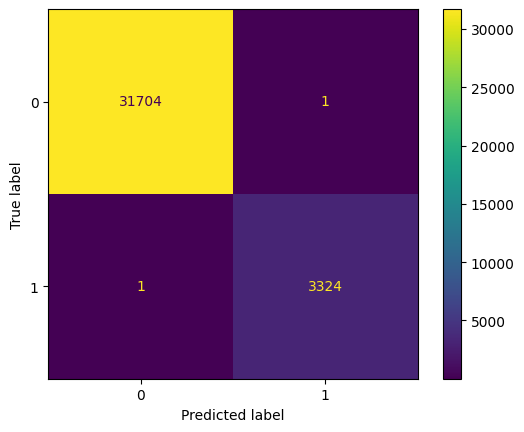

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_reg , X_test, y_test)


**CLASSIFICATION REPORT**

In [102]:
print(classification_report(y_test, model_reg.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31705
           1       1.00      1.00      1.00      3325

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030



# Interpretation:
🚀 Improvement: my model's performance is nearly 10 percentage points higher than the baseline — that’s massive in classification tasks, especially if the classes were initially imbalanced.

🧠 Implication: It’s a strong sign that:

my feature engineering and model selection are highly effective.

The model isn’t just learning the class distribution—it’s genuinely understanding patterns in the data.

In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print('the accuracy baseline :', acc_baseline)


the accuracy baseline : 0.902382974471699


# FEATURE IMPORTANCE

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_over.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

feature_importances.tail(10).sort_values(by = 'importance', ascending=False)


,index,features,importance
46,6,forecast_meter_rent_12m,0.077447
45,12,margin_net_pow_ele,0.073625
44,42,offpeak_diff_dec_january_energy,0.072716
43,27,cons_change,0.069214
42,24,days_since_modif,0.062177
41,16,pow_max,0.055199
40,31,forecast_error_year,0.040658
39,23,tenure_days,0.040545
38,2,cons_last_month,0.040117
37,7,forecast_price_energy_off_peak,0.039607


From this chart, we can observe the following points:

- `forecast_meter_rent_12m` and margin_net_pow_ele is a top driver for churn in this model
- `offpeak_diff_dec_january_energy` also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

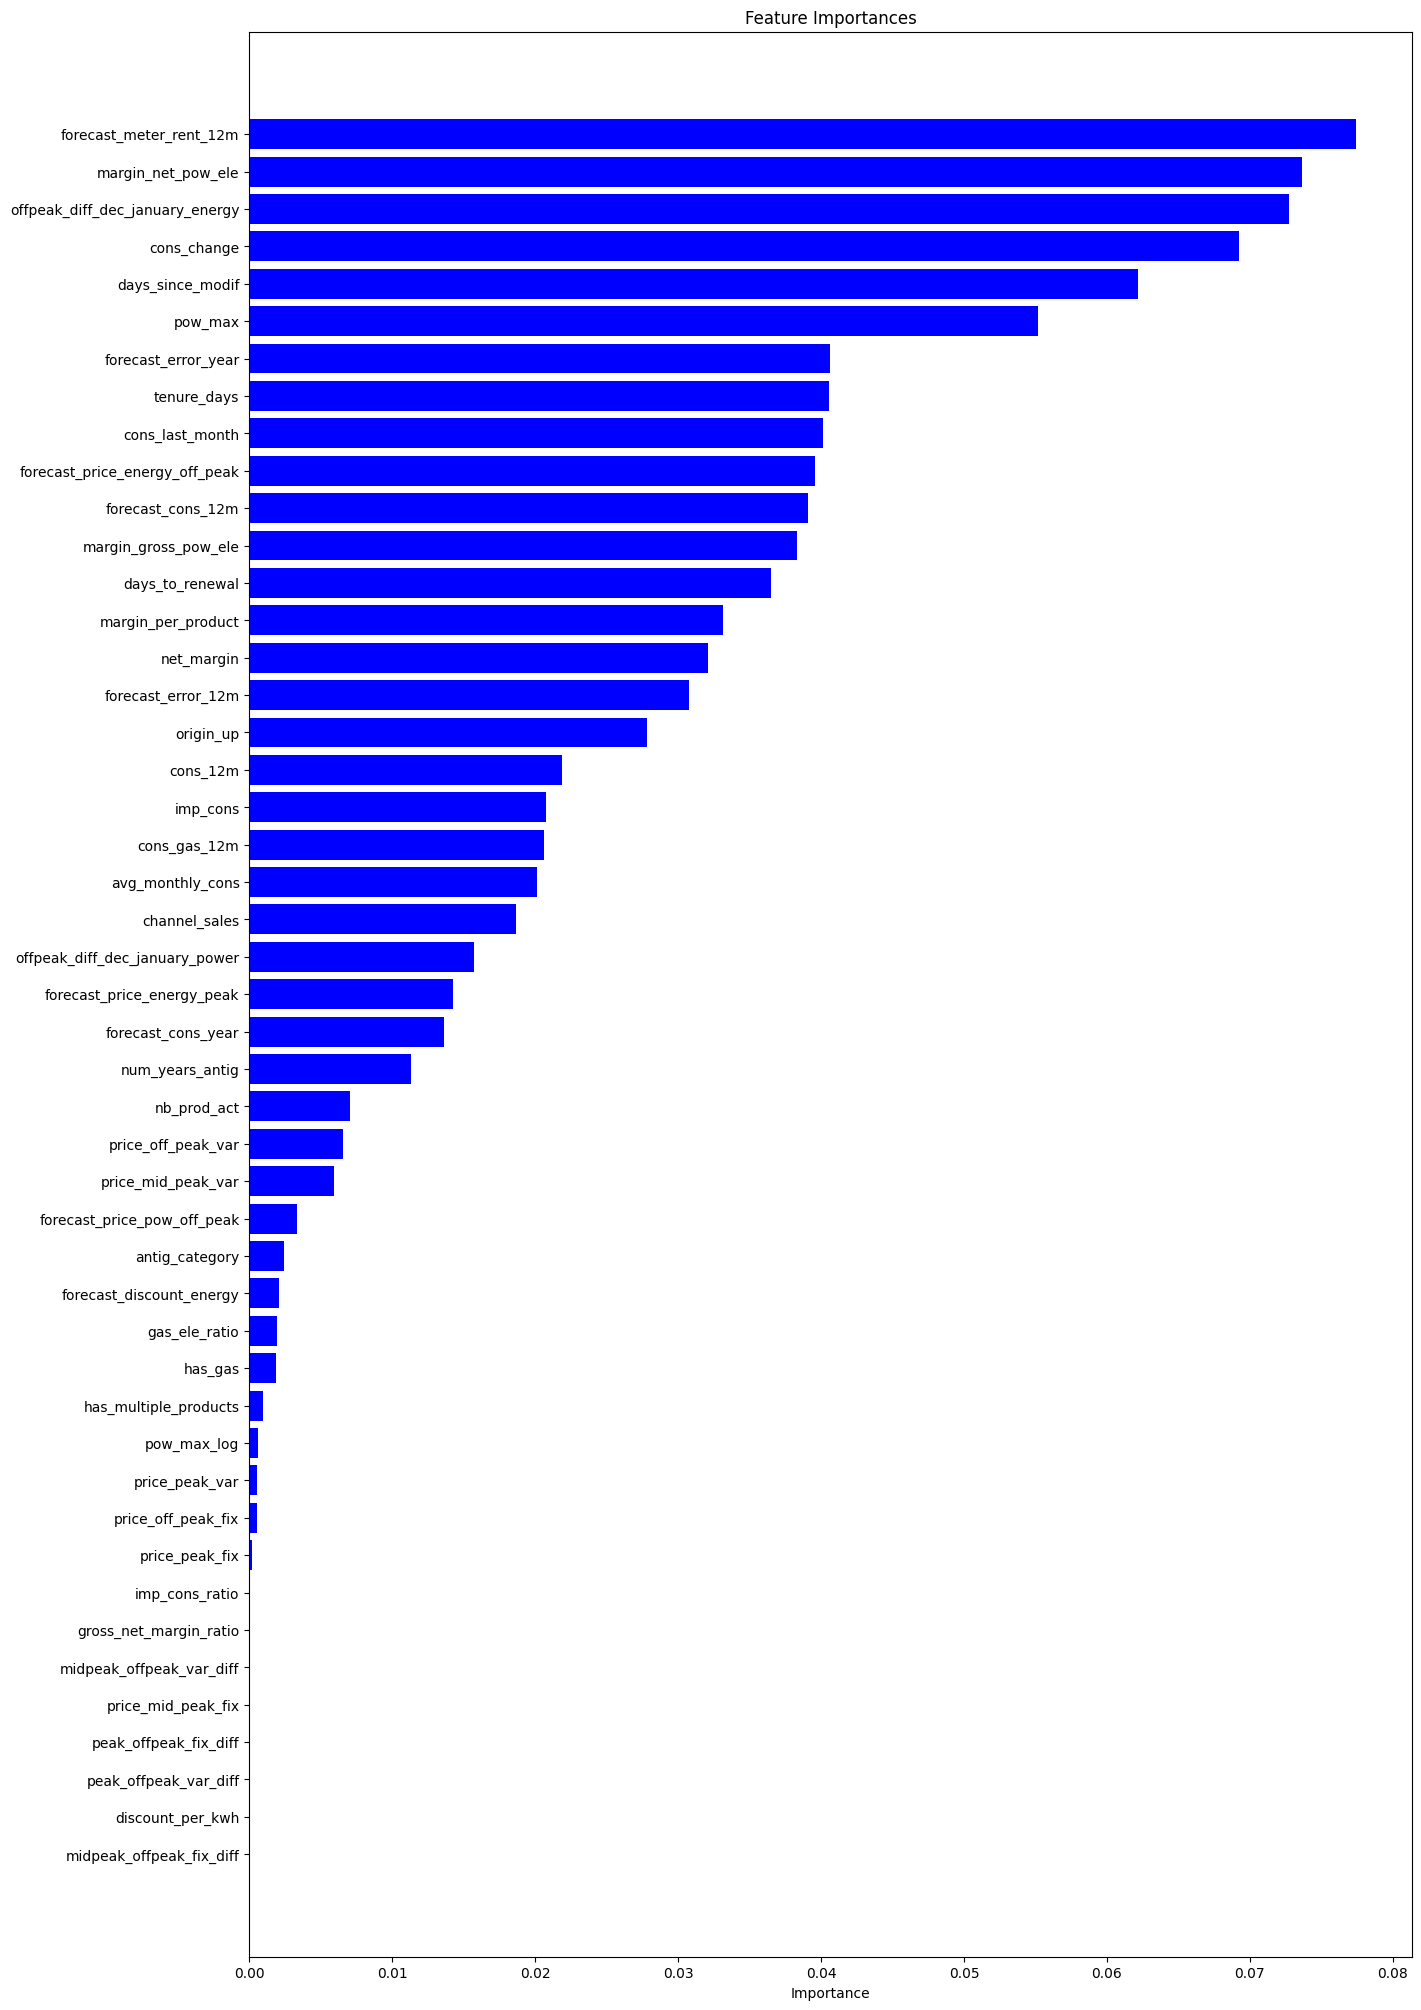

In [94]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()


SAVING THE MODEL

In [107]:
import pickle
# Save the model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model_over, f) 
